In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
x = np.random.uniform(-10, 10, (1000,1))
y = np.random.uniform(-10, 10, (1000,1))
inputs = np.column_stack((x, y))
inputs.shape

(1000, 2)

In [4]:
noise = np.random.uniform(-1, 1, (1000,1))
targets = 2*x - 3*y + 5 + noise
targets.shape

(1000, 1)

In [5]:
np.savez('TF_Minimal_Example_Data', inputs=inputs, targets=targets)

In [6]:
data = np.load('./TF_Minimal_Example_Data.npz')

In [7]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(data['inputs'], data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.9189    
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9114 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9019 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7394 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4801 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3877 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3472 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3370 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3487 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3293 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3428 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3197 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3183 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3493 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [8]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9932374],
       [-3.0125737]], dtype=float32)

In [9]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0367737], dtype=float32)

In [10]:
prediction = model.predict_on_batch(data['inputs'])

In [11]:
prediction.shape

(1000, 1)

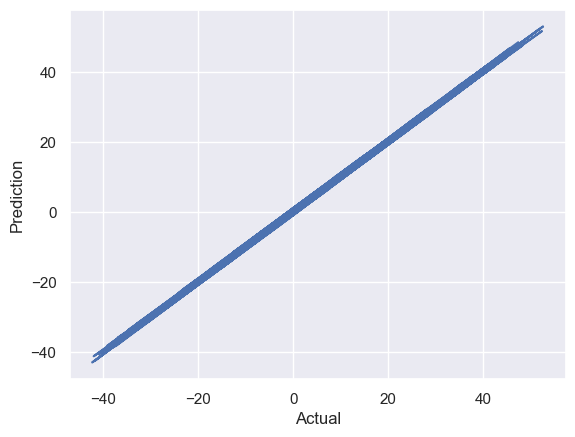

In [12]:
plt.plot(data['targets'], prediction)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()